In [56]:
  import numpy as np
  import pandas as pd
  import seaborn as sns
  import matplotlib.pyplot as plt
  import plotly.graph_objects as go

  from yellowbrick.classifier import ConfusionMatrix
  from yellowbrick.classifier import ClassPredictionError
  from yellowbrick.classifier import ROCAUC
  from yellowbrick.style import set_palette
  from sklearn.cluster import KMeans

  import warnings
  warnings.filterwarnings('ignore')

In [57]:
#32581 dòng dữ liệu
#11 thuộc tính

In [58]:
df = pd.read_csv("/content/credit_risk - credit_risk.csv")
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [60]:
# kiểm tra tổng dữ liệu
df.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [61]:
# sử dụng để kiểm tra và loại bỏ các dòng dữ liệu chứa giá trị thiếu
df = df.dropna()
df.isna().sum()

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

In [62]:
# điền các giá trị thiếu trong dữ liệu bằng giá trị trung bình của cột tương ứng
from sklearn.impute import SimpleImputer
most_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [63]:
# Dòng mã này là cột
df.drop(["Id"], axis=1, inplace=True)

In [64]:
# Chứa hai cột là "Income" và "Age"
X = df[['Income','Age']]

In [65]:
# Tạo một phiên bản của KMeans
kmeans = KMeans(n_clusters=3)

In [66]:
# Điều chỉnh mô hình cho phù hợp với dữ liệu
kmeans.fit(X)

KMeans(n_clusters=3)

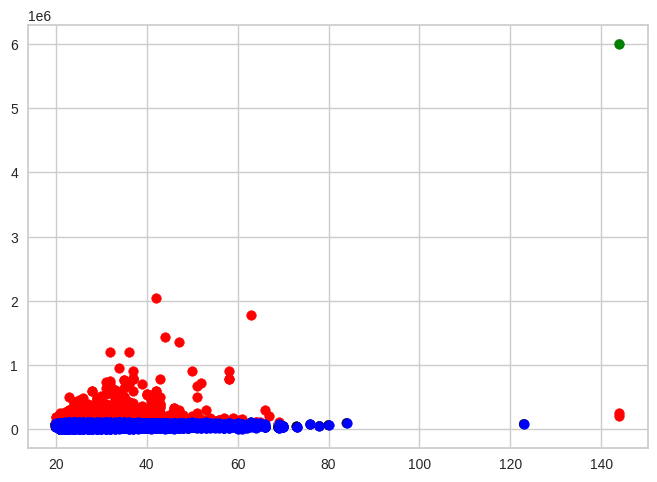

In [67]:
# Nhận các bài tập cụm cho từng điểm dữ liệu
labels = kmeans.labels_

# Thêm nhãn cụm vào DataFrame
df['cluster'] = labels
colors = ['red', 'green', 'blue']
# Vẽ các cụm
plt.scatter(df['Age'], df['Income'], c=df['cluster'])
# Vẽ các cụm với màu sắc khác nhau
for i in range(3):
    plt.scatter(df[df['cluster'] == i]['Age'], df[df['cluster'] == i]['Income'], color=colors[i])

plt.show()

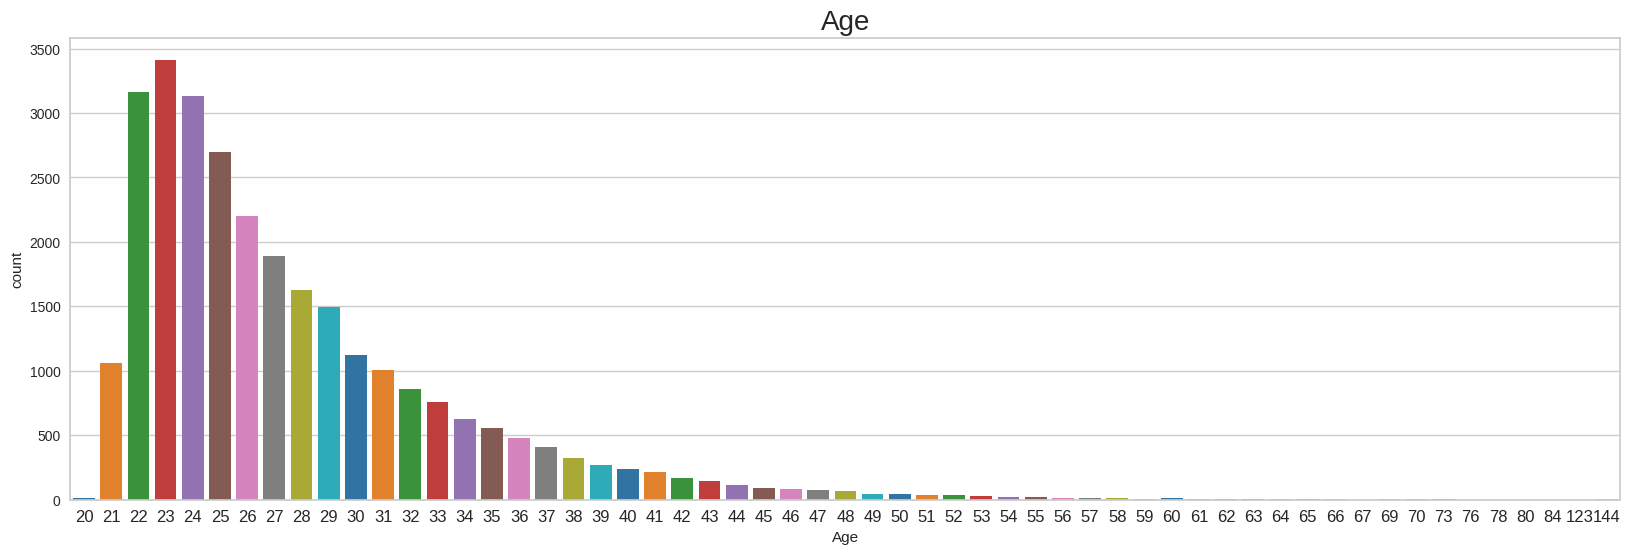

In [68]:
# hiển thị một biểu đồ cột dọc của Tuổi
fig, ax = plt.subplots(figsize=(20, 6))
sns.countplot(x=df["Age"], palette="tab10")
plt.title('Age', fontsize = 20)
plt.xticks(fontsize = 12)
plt.show()

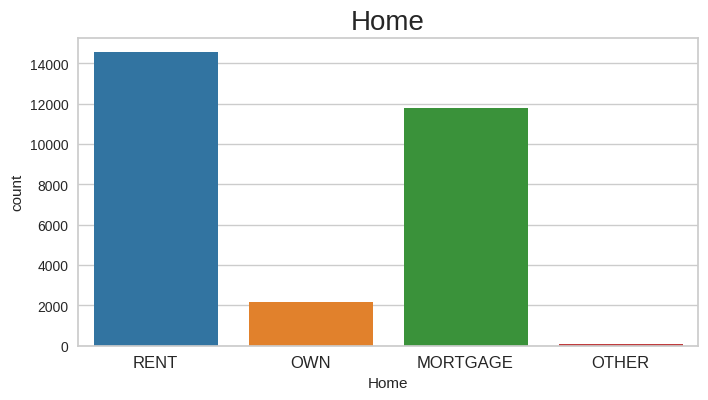

In [69]:
# hiển thị một biểu đồ cột dọc của Nhà
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=df["Home"], palette="tab10")
plt.title('Home', fontsize = 20)
plt.xticks(fontsize = 12)
plt.show()

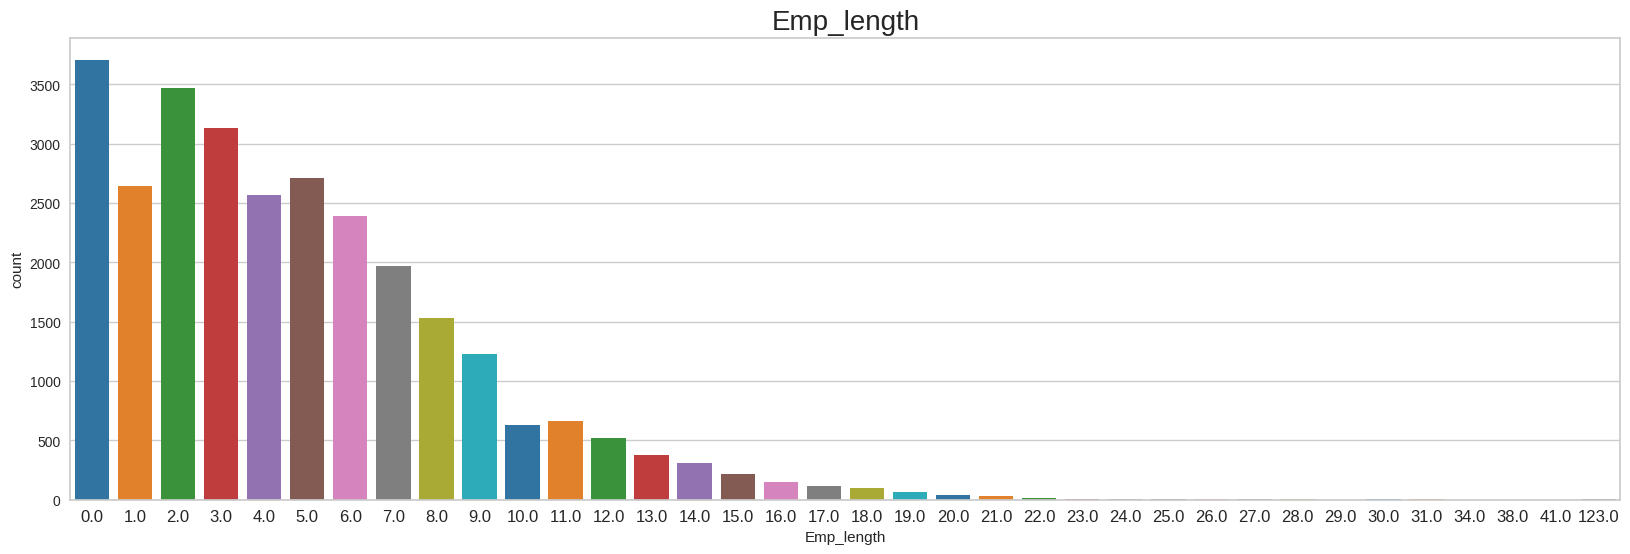

In [70]:
# hiển thị một biểu đồ cột dọc của Thời gian làm việc
fig, ax = plt.subplots(figsize=(20, 6))
sns.countplot(x=df["Emp_length"], palette="tab10")
plt.title('Emp_length', fontsize = 20)
plt.xticks(fontsize = 12)
plt.show()

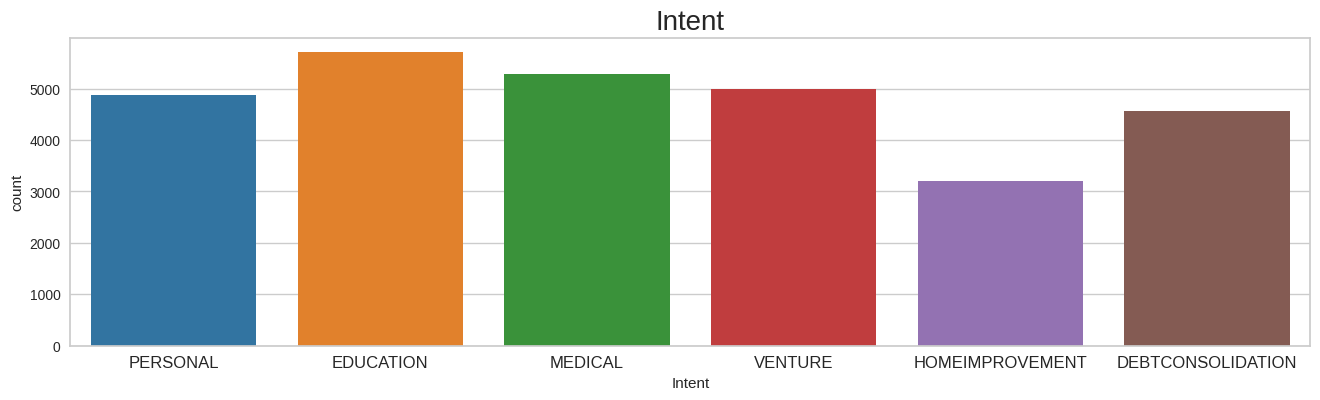

In [71]:
# hiển thị một biểu đồ cột dọc của Mục địch ,ý định
fig, ax = plt.subplots(figsize=(16, 4))
sns.countplot(x=df["Intent"], palette="tab10")
plt.title('Intent', fontsize = 20)
plt.xticks(fontsize = 12)
plt.show()

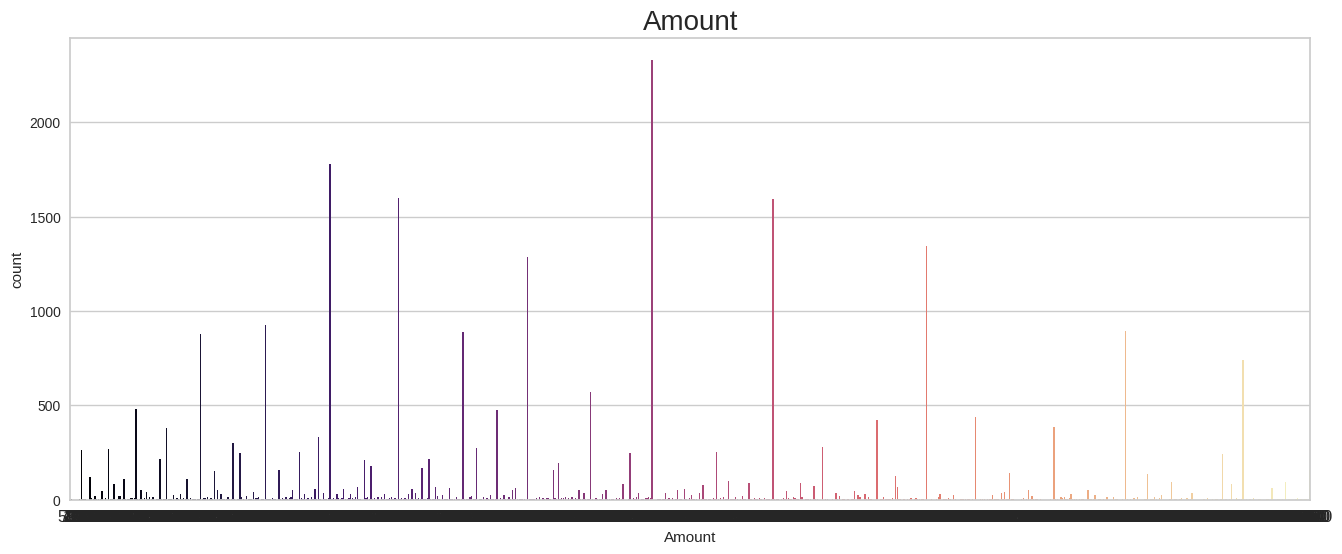

In [72]:
# hiển thị một biểu đồ cột dọc của Số lượng vay
fig, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x=df["Amount"], palette="magma")
plt.title('Amount', fontsize = 20)
plt.xticks(fontsize = 12)
plt.show()

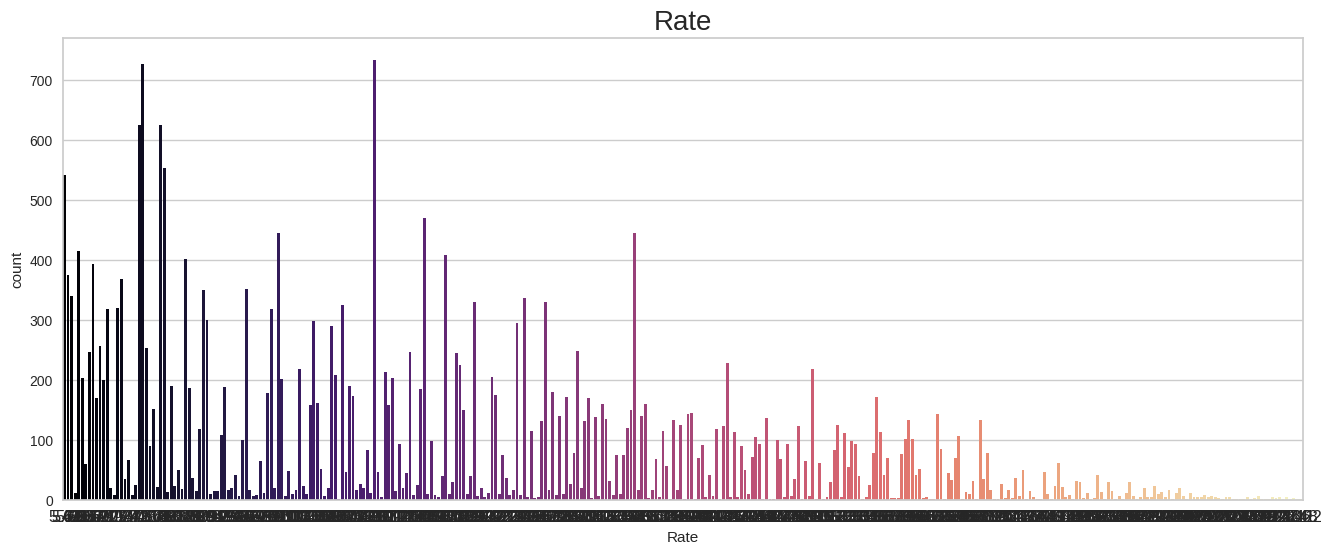

In [73]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x=df["Rate"], palette="magma")
plt.title('Rate', fontsize = 20)
plt.xticks(fontsize = 12)
plt.show()

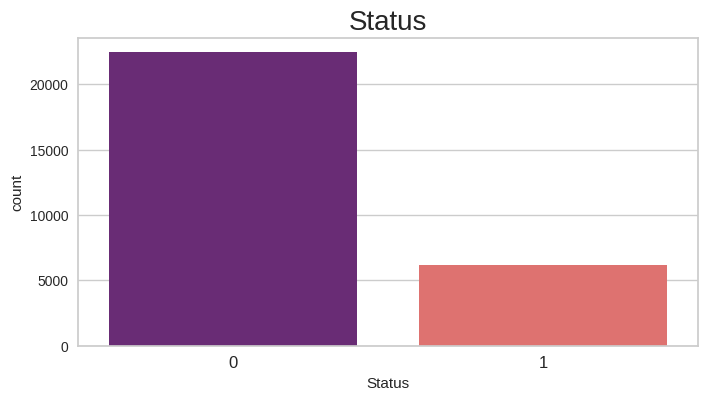

In [74]:
# hiển thị một biểu đồ cột dọc của Trạng thái khoản vay
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=df["Status"], palette="magma")
plt.title('Status', fontsize = 20)
plt.xticks(fontsize = 12)
plt.show()

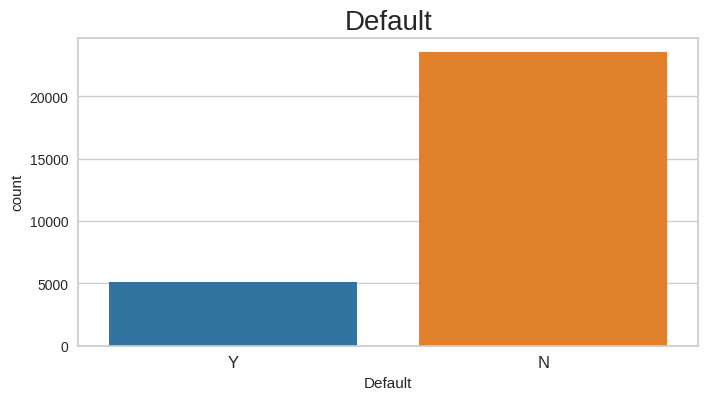

In [75]:
# hiển thị một biểu đồ cột dọc của Mặc Định
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=df["Default"], palette="tab10")
plt.title('Default', fontsize = 20)
plt.xticks(fontsize = 12)
plt.show()

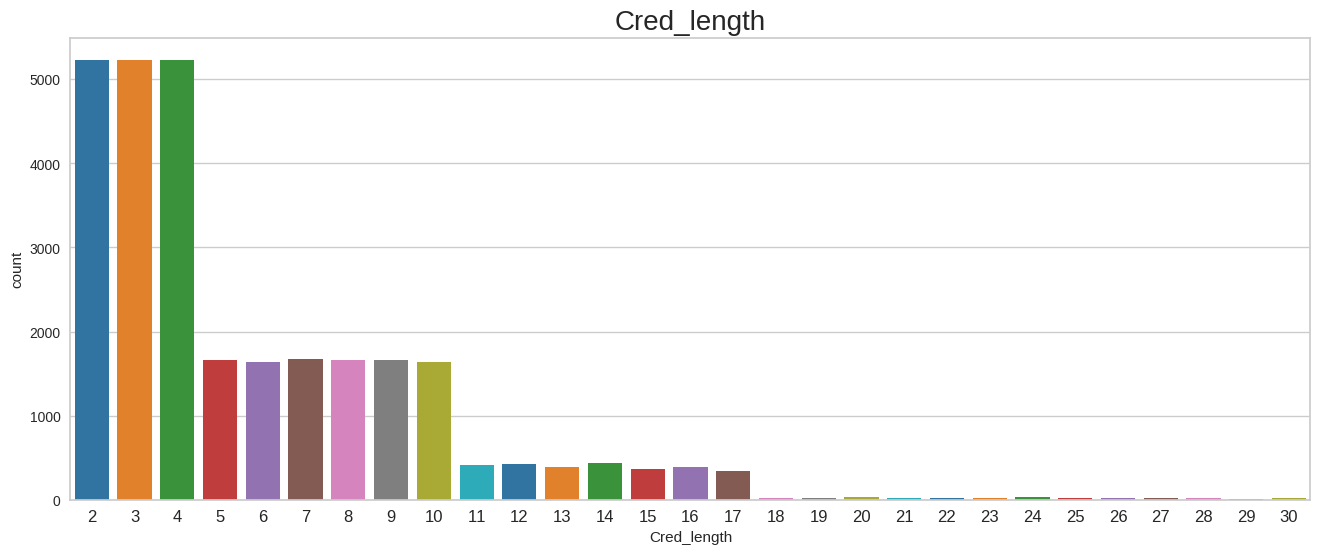

In [76]:
# hiển thị một biểu đồ cột dọc của Độ dài tín dụng
fig, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x=df["Cred_length"], palette="tab10")
plt.title('Cred_length', fontsize = 20)
plt.xticks(fontsize = 12)
plt.show()

In [77]:
# Chuyển đổi các biến categorical thành dạng số nguyên
from sklearn.preprocessing import LabelEncoder

# instanciar encoder
lb = LabelEncoder()

objList = df.select_dtypes(include = "object").columns

for obj in objList:
    df[obj] = lb.fit_transform(df[obj].astype(str))

In [78]:
df.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length,cluster
0,22,59000,3,123.0,4,35000,16.02,1,0.59,1,3,2
1,21,9600,2,5.0,1,1000,11.14,0,0.10,0,2,2
2,25,9600,0,1.0,3,5500,12.87,1,0.57,0,3,2
3,23,65500,3,4.0,3,35000,15.23,1,0.53,0,2,2
4,24,54400,3,8.0,3,35000,14.27,1,0.55,1,4,2


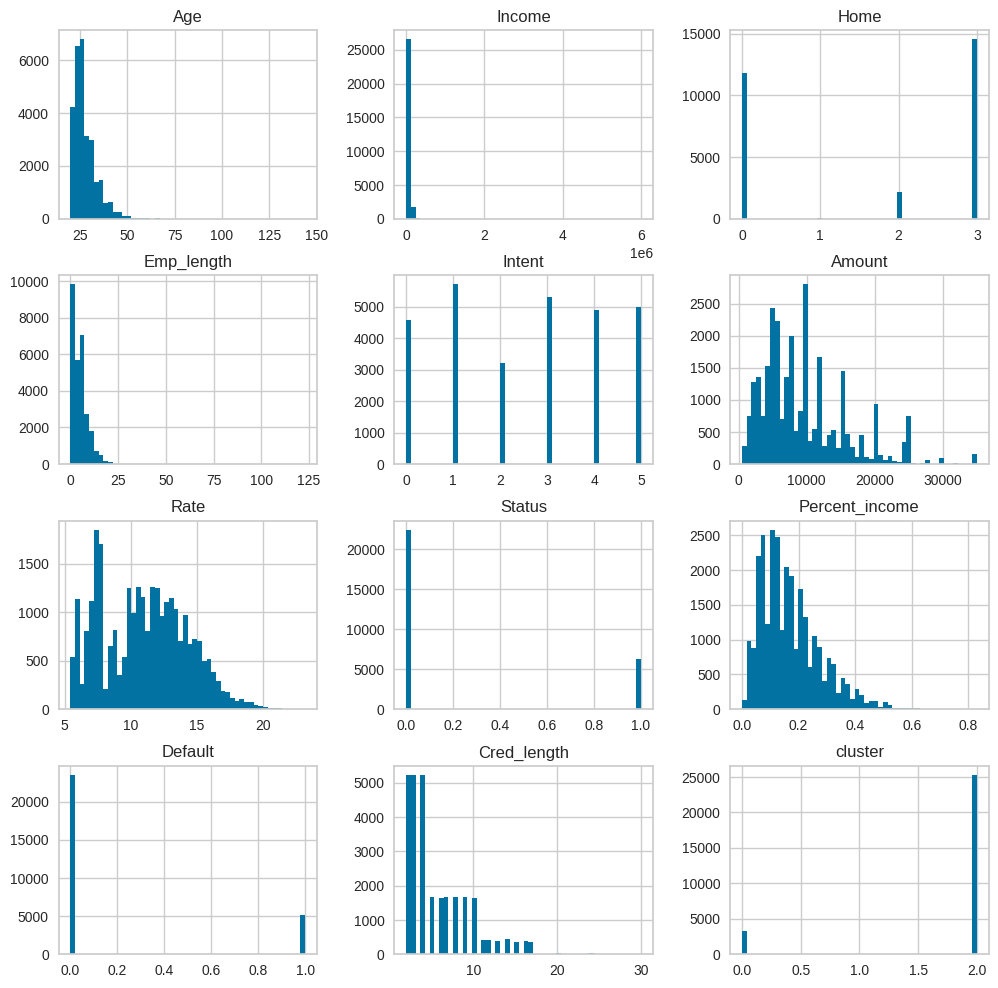

In [79]:
# Mỗi biểu đồ tương ứng với một cột trong DataFrame
df.hist(bins=50, figsize=(12,12))
plt.show()

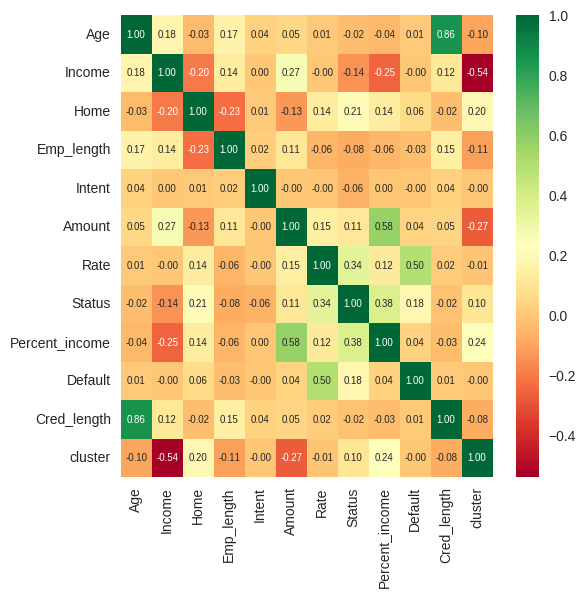

In [80]:
# Hiển thị các giá trị tương quan giữa các cặp biến dưới dạng màu sắc
df_corr = df.corr()
f, ax = plt.subplots(figsize=(6, 6))

sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 7}, ax=ax)
plt.show()

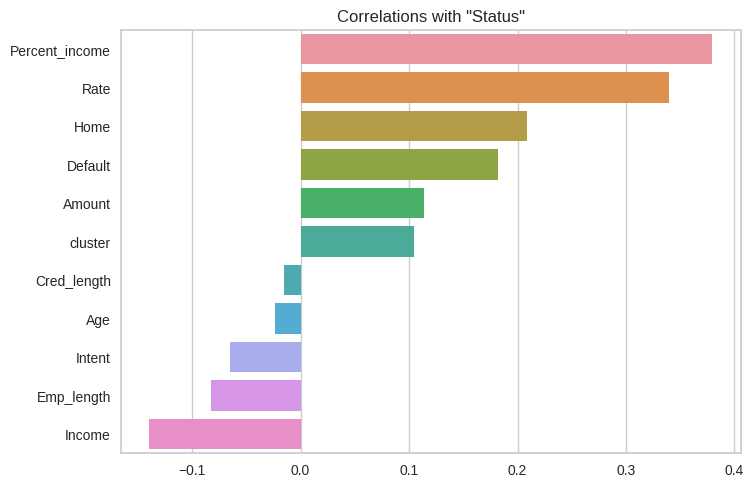

In [81]:
# Hiển thị các giá trị tương quan giữa các cặp biến dưới dạng màu sắc
limit = -1.0

data = df.corr()["Status"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "Status"')
plt.show()
# Mối tương quan

# **----------------------------DecisionTree----------------------------**


In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [84]:
obj_cols = df.select_dtypes(include=['object']).columns
obj_cols

Index([], dtype='object')

In [85]:
num_cols = df.select_dtypes(include=['number']).columns
num_cols

Index(['Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate',
       'Status', 'Percent_income', 'Default', 'Cred_length', 'cluster'],
      dtype='object')

In [86]:
from sklearn.preprocessing import LabelEncoder
obj_df = pd.DataFrame()
for col in obj_cols:
  encoder = LabelEncoder()
  obj_df[col] = pd.DataFrame(encoder.fit_transform(df[col]))

obj_df.columns = obj_cols
obj_df

""


In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
number_df = pd.DataFrame(scaler.fit_transform(df[num_cols]))
number_df.columns = num_cols
number_df

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length,cluster
0,-0.907594,-0.122674,0.919733,28.453433,0.849052,4.003984,1.542164,1.901788,3.952527,2.147555,-0.691791,0.361118
1,-1.066064,-0.914907,0.222612,0.050866,-0.885267,-1.367627,0.031008,-0.525821,-0.653141,-0.465646,-0.939413,0.361118
2,-0.432183,-0.914907,-1.171629,-0.911932,0.270946,-0.656678,0.566725,1.901788,3.764540,-0.465646,-0.691791,0.361118
3,-0.749123,-0.018433,0.919733,-0.189833,0.270946,4.003984,1.297530,1.901788,3.388567,-0.465646,-0.939413,0.361118
4,-0.590653,-0.196445,0.919733,0.772966,0.270946,4.003984,1.000253,1.901788,3.576554,2.147555,-0.444169,0.361118
...,...,...,...,...,...,...,...,...,...,...,...,...
28633,4.638867,-0.218897,-1.171629,-0.911932,0.849052,-0.609282,0.656527,-0.525821,-0.559148,-0.465646,5.994006,0.361118
28634,4.163456,0.855590,-1.171629,-0.189833,0.849052,1.258933,-1.099263,-0.525821,-0.183175,-0.465646,3.270163,-2.769412
28635,5.906629,0.149957,0.919733,-0.430533,-0.307161,4.003984,-0.015442,1.901788,2.730615,-0.465646,5.498762,0.361118
28636,4.480397,1.336704,-1.171629,0.050866,0.849052,0.844213,0.136293,-0.525821,-0.653141,-0.465646,5.003517,-2.769412


In [88]:
df_train = pd.concat([number_df, obj_df], axis=1, join='inner')
df_train

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length,cluster


In [89]:
df.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length,cluster
0,22,59000,3,123.0,4,35000,16.02,1,0.59,1,3,2
1,21,9600,2,5.0,1,1000,11.14,0,0.10,0,2,2
2,25,9600,0,1.0,3,5500,12.87,1,0.57,0,3,2
3,23,65500,3,4.0,3,35000,15.23,1,0.53,0,2,2
4,24,54400,3,8.0,3,35000,14.27,1,0.55,1,4,2


In [90]:
df_train=df
X = df_train.drop(['Default'], axis=1).copy()

y = df_train['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [91]:
label_encoder = LabelEncoder()
# Mã hóa cột "Trang chủ"
X_train["Home"] = label_encoder.fit_transform(X_train["Home"])
X_train["Intent"] = label_encoder.fit_transform(X_train["Intent"])

X_test["Home"] = label_encoder.fit_transform(X_test["Home"])
X_test["Intent"] = label_encoder.fit_transform(X_test["Intent"])

In [92]:
max_depth_list = range(3, 50)
accuracy_dict = {}
for depth in max_depth_list:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[depth] = accuracy

for depth, acc in accuracy_dict.items():
    print(f"max_depth: {depth}, Accuracy: {acc}")

max_depth: 3, Accuracy: 0.8278489048777907
max_depth: 4, Accuracy: 0.8285895672415617
max_depth: 5, Accuracy: 0.8285895672415617
max_depth: 6, Accuracy: 0.8273198603322399
max_depth: 7, Accuracy: 0.8256269177864777
max_depth: 8, Accuracy: 0.8230875039678341
max_depth: 9, Accuracy: 0.8228758861496138
max_depth: 10, Accuracy: 0.8226642683313935
max_depth: 11, Accuracy: 0.8234049306951645
max_depth: 12, Accuracy: 0.8219236059676225
max_depth: 13, Accuracy: 0.8203364723309703
max_depth: 14, Accuracy: 0.8226642683313935
max_depth: 15, Accuracy: 0.8238281663316052
max_depth: 16, Accuracy: 0.8231933128769442
max_depth: 17, Accuracy: 0.8224526505131732
max_depth: 18, Accuracy: 0.8213945614220718
max_depth: 19, Accuracy: 0.8213945614220718
max_depth: 20, Accuracy: 0.8218177970585123
max_depth: 21, Accuracy: 0.822346841604063
max_depth: 22, Accuracy: 0.822981695058724
max_depth: 23, Accuracy: 0.8219236059676225
max_depth: 24, Accuracy: 0.8241455930589355
max_depth: 25, Accuracy: 0.82192360596762

In [93]:
best_max_depth = max(accuracy_dict, key=accuracy_dict.get)
print(f"Best best_max_depth: {best_max_depth}")
clf = DecisionTreeClassifier(max_depth=best_max_depth)
clf.fit(X, y)

Best best_max_depth: 4


DecisionTreeClassifier(max_depth=4)

In [94]:
X.columns

Index(['Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate',
       'Status', 'Percent_income', 'Cred_length', 'cluster'],
      dtype='object')

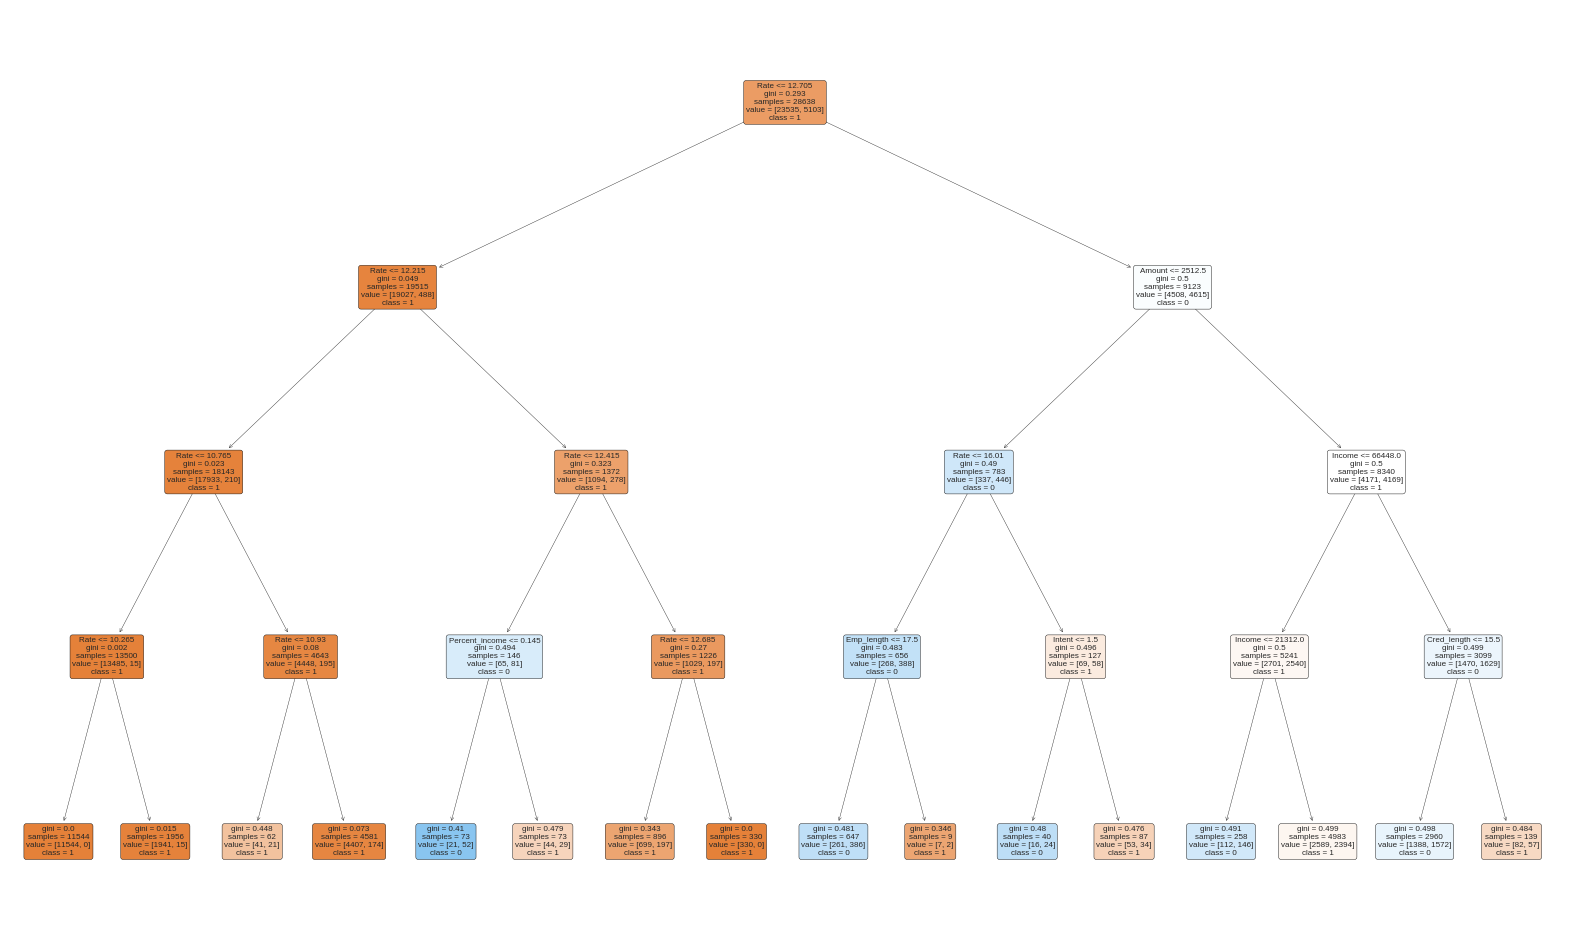

In [95]:
from sklearn import tree
plt.figure(figsize=(20,12))
tree.plot_tree(clf, feature_names=X.columns, class_names=df['Default'].unique().astype('str').tolist(), filled=True,rounded=True,label='all')
plt.show()

           Feature  Importance
6             Rate    0.989289
1           Income    0.003278
8   Percent_income    0.002344
5           Amount    0.002251
9      Cred_length    0.001258
3       Emp_length    0.000805
4           Intent    0.000776
0              Age    0.000000
2             Home    0.000000
7           Status    0.000000
10         cluster    0.000000


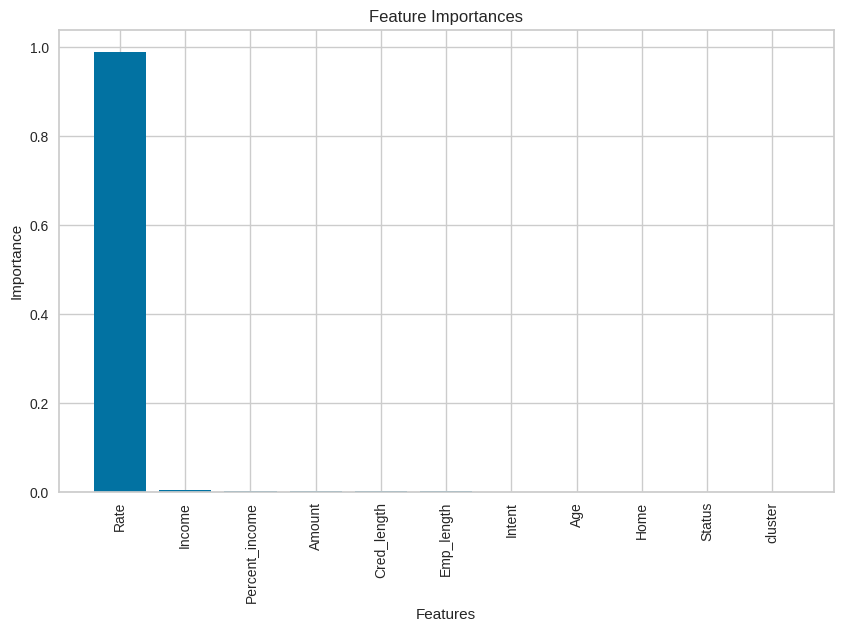

In [96]:
importances = clf.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)
print(feature_importances_df)
plt.figure(figsize=(10,6))
plt.bar(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()
# Tầm quan trọng của tính năng

In [97]:
from sklearn.model_selection import cross_val_score, KFold
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(clf, X, y, cv=k_fold)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.83484637 0.8299581  0.82925978 0.82486468 0.83080147]
Mean cross-validation score: 0.8299460777284509


In [98]:
import joblib
joblib.dump(clf, 'decision_tree_model.joblib')

['decision_tree_model.joblib']

In [99]:
loaded_model = joblib.load('decision_tree_model.joblib')

In [100]:
# Kiểm tra kích thước của tất cả các biến đầu vào
for col in df.columns:
    print(col, df[col].shape)

Age (28638,)
Income (28638,)
Home (28638,)
Emp_length (28638,)
Intent (28638,)
Amount (28638,)
Rate (28638,)
Status (28638,)
Percent_income (28638,)
Default (28638,)
Cred_length (28638,)
cluster (28638,)


In [101]:
df.head()


,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length,cluster
0,22,59000,3,123.0,4,35000,16.02,1,0.59,1,3,2
1,21,9600,2,5.0,1,1000,11.14,0,0.10,0,2,2
2,25,9600,0,1.0,3,5500,12.87,1,0.57,0,3,2
3,23,65500,3,4.0,3,35000,15.23,1,0.53,0,2,2
4,24,54400,3,8.0,3,35000,14.27,1,0.55,1,4,2


In [102]:
# Dự đoán trạng thái phê duyệt khoản vay của một khách hàng mới
new_customer = pd.DataFrame(
  [
   [22,	59000,	3,	123.0,	4,	35000, 16.02,	1,	0.59,	3,	1],
  [21,	9600,	2,	5.0,	1,	1000,	11.14,	0,	0.10,	2,	1],
  [25,	9600,	0,	1.0,	3,	5500,	12.87,	1,	0.57,	3,	1],
  [23,	65500,	3,	4.0,	3,	35000,	15.23,	1,	0.53,	2, 1],
  [24,	54400,	3,	8.0,	3,	35000,	14.27,	1,	0.55,	4,	1]
   ]
)



In [103]:
new_customer

,0,1,2,3,4,5,6,7,8,9,10
0,22,59000,3,123.0,4,35000,16.02,1,0.59,3,1
1,21,9600,2,5.0,1,1000,11.14,0,0.10,2,1
2,25,9600,0,1.0,3,5500,12.87,1,0.57,3,1
3,23,65500,3,4.0,3,35000,15.23,1,0.53,2,1
4,24,54400,3,8.0,3,35000,14.27,1,0.55,4,1


In [107]:
prediction=clf.predict(new_customer) # dự đoán
yes = []
no= []
for i in range(0,len(prediction)):
  if prediction[i] ==0: #du doan bằng 0 --> yes
    yes.append(i)
    print(str(i) + " Duyệt")
  else:
    no.append(i)       #du doan bằng 1 --> no
    print(str(i) +" Không Duyệt")

print(yes)# duyet
print(no) # khong duyet

0 Duyệt
1 Duyệt
2 Không Duyệt
3 Duyệt
4 Duyệt
[0, 1, 3, 4]
[2]
